In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("/kaggle/input/medium-articles-dataset/medium_data.csv")
data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [12]:
title = data[['title']]
title

,title
0,A Beginner’s Guide to Word Embedding with Gens...
1,Hands-on Graph Neural Networks with PyTorch & ...
2,How to Use ggplot2 in Python
3,Databricks: How to Save Files in CSV on Your L...
4,A Step-by-Step Implementation of Gradient Desc...
...,...
6503,“We” vs “I” — How Should You Talk About Yourse...
6504,How Donald Trump Markets Himself
6505,Content and Marketing Beyond Mass Consumption
6506,5 Questions All Copywriters Should Ask Clients...


In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [17]:
toke = Tokenizer(oov_token='<oov>')

In [14]:
data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [15]:
data['title'] = data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
data['title'] = data['title'].apply(lambda x: x.replace('\u200a',' '))

In [16]:
data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [18]:
toke.fit_on_texts(data['title'])

In [24]:
len(toke.word_index)

8237

In [25]:
total_word = len(toke.word_index) + 1

In [26]:
total_word

8238

In [31]:
input_sequences = []
for i in data['title']:
    tokenized_words = toke.texts_to_sequences([i])[0]
    
    for j in range(1,len(tokenized_words)):
        input_sequences.append(tokenized_words[:j+1])
        

In [36]:
max([len(i) for i in input_sequences])

40

In [37]:
max_len = max([len(i) for i in input_sequences])

In [39]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_len,padding = "pre"))

In [40]:
input_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
       676], dtype=int32)

In [41]:
x = input_sequences[:,:-1]
y = input_sequences[:,-1]

In [49]:
x.shape

(48461, 39)

In [51]:
y = tensorflow.keras.utils.to_categorical(y, num_classes=total_word)

In [61]:
model = Sequential()

model.add(Embedding(total_word,100,input_length= max_len-1))
model.add(LSTM(150))
model.add(Dense(total_word,activation = 'softmax'))


In [62]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x,y,epochs = 25)

Epoch 1/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.0504 - loss: 7.3009
Epoch 2/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 144s 59ms/step - accuracy: 0.1178 - loss: 6.3910
Epoch 3/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.1505 - loss: 5.8858
Epoch 4/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.1791 - loss: 5.4103
Epoch 5/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.2022 - loss: 4.9678
Epoch 6/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 146s 61ms/step - accuracy: 0.2270 - loss: 4.5913
Epoch 7/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.2603 - loss: 4.1754
Epoch 8/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.3005 - loss: 3.7973
Epoch 9/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 144s 60ms/step - accuracy: 0.3537 - loss: 3.4307
Epoch 10/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 0.4060 - loss: 3.1033
Epoch 11/25
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.4580 - loss: 2.8056
Epo

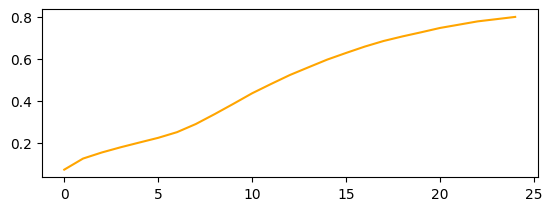

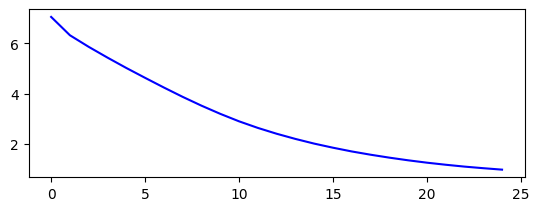

In [69]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'],c = 'orange')
plt.show()

plt.subplot(2,1,2)
plt.plot(hist.history['loss'],c = 'blue')
plt.show()

In [89]:
text = 'The next '
for i in range(10):
    tok_text = toke.texts_to_sequences([text])[0]
    pad_toke_text = pad_sequences([tok_text],maxlen = max_len,padding='pre')
    pos = np.argmax(model.predict(pad_toke_text))
    print(pos)
    for j,k in toke.word_index.items():
        if k == pos:
            text = text + " " + j
            print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
108
The next  big
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
156
The next  big tech
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1164
The next  big tech gig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
69
The next  big tech gig will
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
27
The next  big tech gig will be
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3
The next  big tech gig will be the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
140
The next  big tech gig will be the great
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
291
The next  big tech gig will be the great brain
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
44
The next  big tech gig will be the great brain when
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
133
The next  big tech gig will be the great brain when it’s
